<a href="https://colab.research.google.com/github/ehyecha/medical-data-analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt

In [ ]:
asc = pd.read_csv('/content/acs.csv')
asc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               857 non-null    int64  
 1   sex               857 non-null    object 
 2   cardiogenicShock  857 non-null    object 
 3   entry             857 non-null    object 
 4   Dx                857 non-null    object 
 5   EF                723 non-null    float64
 6   height            764 non-null    float64
 7   weight            766 non-null    float64
 8   BMI               764 non-null    float64
 9   obesity           857 non-null    object 
 10  TC                834 non-null    float64
 11  LDLC              833 non-null    float64
 12  HDLC              834 non-null    float64
 13  TG                842 non-null    float64
 14  DM                857 non-null    object 
 15  HBP               857 non-null    object 
 16  smoking           857 non-null    object 
dt

In [ ]:
asc.isnull().sum()

age                   0
sex                   0
cardiogenicShock      0
entry                 0
Dx                    0
EF                  134
height               93
weight               91
BMI                  93
obesity               0
TC                   23
LDLC                 24
HDLC                 23
TG                   15
DM                    0
HBP                   0
smoking               0
dtype: int64

In [ ]:
asc.head(5)

,age,sex,cardiogenicShock,entry,Dx,EF,height,weight,BMI,obesity,TC,LDLC,HDLC,TG,DM,HBP,smoking
0,62,Male,No,Femoral,STEMI,18.0,168.0,72.0,25.510204,Yes,215.0,154.0,35.0,155.0,Yes,No,Smoker
1,78,Female,No,Femoral,STEMI,18.4,148.0,48.0,21.913806,No,NaN,NaN,NaN,166.0,No,Yes,Never
2,76,Female,Yes,Femoral,STEMI,20.0,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,No,Yes,Never
3,89,Female,No,Femoral,STEMI,21.8,165.0,50.0,18.365473,No,121.0,73.0,20.0,89.0,No,No,Never
4,56,Male,No,Radial,NSTEMI,21.8,162.0,64.0,24.386526,No,195.0,151.0,36.0,63.0,Yes,Yes,Smoker


In [ ]:
asc['Dx'].value_counts()

Dx
Unstable Angina    400
STEMI              304
NSTEMI             153
Name: count, dtype: int64

<Axes: xlabel='Dx', ylabel='count'>

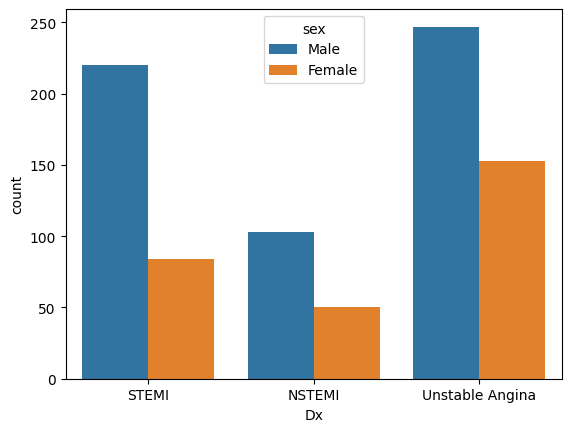

In [ ]:
sns.countplot(asc, x="Dx", hue="sex")

<Axes: xlabel='Dx', ylabel='count'>

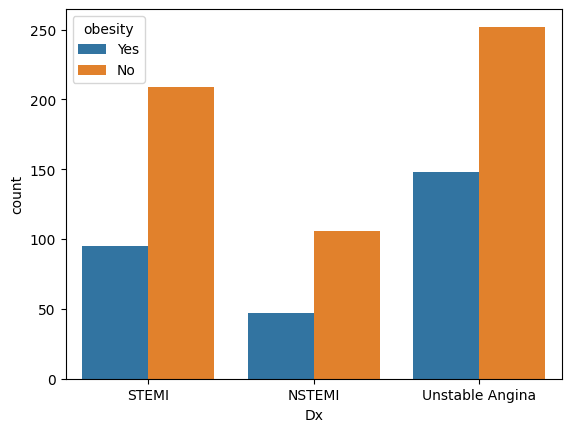

In [ ]:
sns.countplot(asc, x="Dx", hue="obesity")

In [ ]:
asc.isnull().sum()

for i in asc.columns:
  missingValue = asc[i].isna().sum() / len(asc) * 100
  if missingValue > 0:
    print("missing cols: {} : {}%".format(i, round(missingValue, 2)))

missing cols: EF : 15.64%
missing cols: height : 10.85%
missing cols: weight : 10.62%
missing cols: BMI : 10.85%
missing cols: TC : 2.68%
missing cols: LDLC : 2.8%
missing cols: HDLC : 2.68%
missing cols: TG : 1.75%


In [ ]:
asc.describe()

,age,EF,height,weight,BMI,TC,LDLC,HDLC,TG
count,857.000000,723.000000,764.000000,766.000000,764.000000,834.000000,833.000000,834.000000,842.000000
mean,63.311552,55.834440,163.175393,64.843734,24.281900,185.200240,116.583433,38.235012,125.238717
std,11.696304,9.622964,9.079307,11.355191,3.346696,47.772925,41.094849,11.086690,90.852594
min,28.000000,18.000000,130.000000,30.000000,15.615705,25.000000,15.000000,4.000000,11.000000
25%,55.000000,50.450000,158.000000,58.000000,22.129740,154.000000,88.000000,32.000000,68.000000
50%,64.000000,58.100000,165.000000,65.000000,24.161042,183.000000,114.000000,38.000000,105.500000
75%,72.000000,62.350000,170.000000,72.000000,26.174173,213.000000,141.000000,45.000000,154.000000
max,91.000000,79.000000,185.000000,112.000000,41.420118,493.000000,366.000000,89.000000,877.000000


In [ ]:
# 덜 중요한 피처 제거
asc = asc.drop(columns=['entry', 'height', 'weight'])

In [ ]:
 #EF , height  weight, BMI, TC, LDLD, HDLC, TG 결측치를 평균값으로 지정


asc['EF'] = asc['EF'].fillna(asc['EF'].mean())
# asc['height'] = asc['height'].fillna(asc['height'].mean())
# asc['weight'] = asc['weight'].fillna(asc['weight'].mean())
asc['BMI'] = asc['BMI'].fillna(asc['BMI'].median())
asc['TC'] = asc['TC'].fillna(asc['TC'].mean())
asc['LDLC'] = asc['LDLC'].fillna(asc['LDLC'].mean())
asc['HDLC'] = asc['HDLC'].fillna(asc['HDLC'].mean())
asc['TG'] = asc['TG'].fillna(asc['TG'].mean())

In [ ]:
asc.isnull().sum()

age                 0
sex                 0
cardiogenicShock    0
Dx                  0
EF                  0
BMI                 0
obesity             0
TC                  0
LDLC                0
HDLC                0
TG                  0
DM                  0
HBP                 0
smoking             0
dtype: int64

In [ ]:
cols = ['sex','cardiogenicShock','obesity','DM','HBP','smoking']


train_ohe = pd.get_dummies(asc, columns=cols, dtype=int)
train_ohe

,age,Dx,EF,BMI,TC,LDLC,HDLC,TG,sex_Female,sex_Male,...,cardiogenicShock_Yes,obesity_No,obesity_Yes,DM_No,DM_Yes,HBP_No,HBP_Yes,smoking_Ex-smoker,smoking_Never,smoking_Smoker
0,62,STEMI,18.00000,25.510204,215.00000,154.000000,35.000000,155.000000,0,1,...,0,0,1,0,1,1,0,0,0,1
1,78,STEMI,18.40000,21.913806,185.20024,116.583433,38.235012,166.000000,1,0,...,0,1,0,1,0,0,1,0,1,0
2,76,STEMI,20.00000,24.161042,185.20024,116.583433,38.235012,125.238717,1,0,...,1,1,0,1,0,0,1,0,1,0
3,89,STEMI,21.80000,18.365473,121.00000,73.000000,20.000000,89.000000,1,0,...,0,1,0,1,0,1,0,0,1,0
4,56,NSTEMI,21.80000,24.386526,195.00000,151.000000,36.000000,63.000000,0,1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,69,Unstable Angina,55.83444,28.386518,336.00000,224.000000,61.000000,137.000000,1,0,...,0,0,1,1,0,0,1,0,1,0
853,86,Unstable Angina,55.83444,24.819945,232.00000,153.000000,41.000000,182.000000,1,0,...,0,1,0,1,0,0,1,0,1,0
854,78,Unstable Angina,55.83444,24.034610,178.40000,130.000000,29.000000,97.000000,1,0,...,0,1,0,0,1,0,1,0,1,0
855,67,Unstable Angina,55.83444,26.298488,177.20000,107.000000,36.000000,286.000000,0,1,...,0,0,1,0,1,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder


# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

# fit, transform 메소드를 통한 레이블 인코딩
encoder.fit(train_ohe['Dx'])

train_ohe['Dx'] = encoder.transform(train_ohe['Dx'])
train_ohe

,age,Dx,EF,BMI,TC,LDLC,HDLC,TG,sex_Female,sex_Male,...,cardiogenicShock_Yes,obesity_No,obesity_Yes,DM_No,DM_Yes,HBP_No,HBP_Yes,smoking_Ex-smoker,smoking_Never,smoking_Smoker
0,62,1,18.00000,25.510204,215.00000,154.000000,35.000000,155.000000,0,1,...,0,0,1,0,1,1,0,0,0,1
1,78,1,18.40000,21.913806,185.20024,116.583433,38.235012,166.000000,1,0,...,0,1,0,1,0,0,1,0,1,0
2,76,1,20.00000,24.161042,185.20024,116.583433,38.235012,125.238717,1,0,...,1,1,0,1,0,0,1,0,1,0
3,89,1,21.80000,18.365473,121.00000,73.000000,20.000000,89.000000,1,0,...,0,1,0,1,0,1,0,0,1,0
4,56,0,21.80000,24.386526,195.00000,151.000000,36.000000,63.000000,0,1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,69,2,55.83444,28.386518,336.00000,224.000000,61.000000,137.000000,1,0,...,0,0,1,1,0,0,1,0,1,0
853,86,2,55.83444,24.819945,232.00000,153.000000,41.000000,182.000000,1,0,...,0,1,0,1,0,0,1,0,1,0
854,78,2,55.83444,24.034610,178.40000,130.000000,29.000000,97.000000,1,0,...,0,1,0,0,1,0,1,0,1,0
855,67,2,55.83444,26.298488,177.20000,107.000000,36.000000,286.000000,0,1,...,0,0,1,0,1,0,1,0,1,0


In [ ]:
X = train_ohe.drop(columns="Dx")
y = train_ohe['Dx']

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


temp = scaler.fit_transform(X.loc[:, ["age", "EF","BMI","TC","LDLC","HDLC", "TG"]])
X["age"] = temp[:, 0]
X["EF"] = temp[:, 1]
X["BMI"] = temp[:,2]
X["TC"] = temp[:,3]
X["LDLC"] = temp[:,4]
X["HDLC"] = temp[:,5]
X["TG"] = temp[:,6]

In [ ]:
X.head(5)

,age,EF,BMI,TC,LDLC,HDLC,TG,sex_Female,sex_Male,cardiogenicShock_No,cardiogenicShock_Yes,obesity_No,obesity_Yes,DM_No,DM_Yes,HBP_No,HBP_Yes,smoking_Ex-smoker,smoking_Never,smoking_Smoker
0,-0.112199,-4.283515,0.393097,0.632701,0.924071,-0.295966,3.306791e-01,0,1,1,0,0,1,0,1,1,0,0,0,1
1,1.256553,-4.238228,-0.745707,0.000000,0.000000,0.000000,4.529006e-01,1,0,1,0,1,0,1,0,0,1,0,1,0
2,1.085459,-4.057080,-0.034117,0.000000,0.000000,0.000000,1.578975e-16,1,0,0,1,1,0,1,0,0,1,0,1,0
3,2.197570,-3.853289,-1.869291,-1.363084,-1.076373,-1.668292,-4.026502e-01,1,0,1,0,1,0,1,0,1,0,0,1,0
4,-0.625481,-3.853289,0.037283,0.208066,0.849980,-0.204478,-6.915375e-01,0,1,1,0,1,0,0,1,0,1,0,0,1


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# 테스트 데이터, 트레이닝 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0xC0FFEE)

X_train.shape, y_train.shape

((599, 20), (599,))

In [ ]:
from sklearn.linear_model import LogisticRegression # 1. Logistic
from sklearn.tree import DecisionTreeClassifier     # 3. Decision Tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # 4. Random Forest
from sklearn.model_selection import GridSearchCV


# 로지스틱 회귀, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅, 서포트 벡터 머신(SVM), K-최근접 이웃(KNN), 신경망 등.
#하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4, 5]
}

In [ ]:
reg = LogisticRegression()
reg2 = DecisionTreeClassifier()
reg3 = RandomForestClassifier()
reg4 = GradientBoostingClassifier()


# GridSearchCV 설정
grid_search = GridSearchCV(estimator=reg4, param_grid=param_grid, scoring='roc_auc_ovr')


reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)



result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)

In [ ]:
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best ROC AUC Score: {grid_search.best_score_}')
result4 = grid_search.predict(X_test)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best ROC AUC Score: 0.671759356911937


In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, result, pos_label=2)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, result2, pos_label=2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, result3, pos_label=2)
fpr4, tpr4, thresholds3 = metrics.roc_curve(y_test, result4, pos_label=2)

print("---------- Logistic Regression ---------")
print('fpr, tpr', fpr, tpr)

print("---------- Decision Tree ---------")
print('fpr, tpr', fpr2, tpr2)

print("---------- Random forest ---------")
print('fpr3, tpr3', fpr3, tpr3)

print("---------- GradientBoostingRegressor ---------")
print('fpr4, tpr4', fpr4, tpr4)


---------- Logistic Regression ---------
fpr, tpr [0.         0.55223881 0.97761194 1.        ] [0.         0.90322581 0.99193548 1.        ]
---------- Decision Tree ---------
fpr, tpr [0.         0.41791045 0.79850746 1.        ] [0.         0.65322581 0.83064516 1.        ]
---------- Random forest ---------
fpr3, tpr3 [0.         0.51492537 0.95522388 1.        ] [0.         0.87096774 0.96774194 1.        ]
---------- GradientBoostingRegressor ---------
fpr4, tpr4 [0.         0.51492537 0.97761194 1.        ] [0.         0.86290323 0.96774194 1.        ]


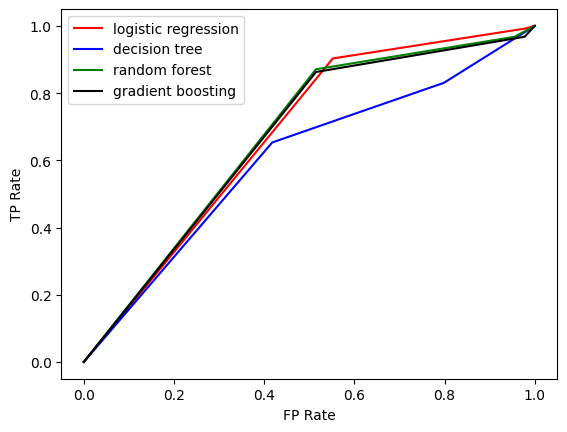

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color = 'red', label = 'logistic regression')
plt.plot(fpr2, tpr2, color = 'blue', label = 'decision tree')
plt.plot(fpr3, tpr3, color = 'green', label = 'random forest')
plt.plot(fpr4, tpr4, color = 'black', label = 'gradient boosting')
#plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

plt.legend() # 그래프 라벨 표시

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_test = reg.predict_proba(X_test)
y_pred_test_2 = reg2.predict_proba(X_test)
y_pred_test_3 = reg3.predict_proba(X_test)
y_pred_test_4 = grid_search.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_test, multi_class="ovo"))
print(roc_auc_score(y_test, y_pred_test_2, multi_class="ovo"))
print(roc_auc_score(y_test, y_pred_test_3, multi_class="ovo"))
print(roc_auc_score(y_test, y_pred_test_4, multi_class="ovo"))

0.6626645190312423
0.529905641896304
0.645995675707051
0.6494837693903909


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = reg.predict(X_test)
y_pred_2 = reg2.predict(X_test)
y_pred_3 = reg3.predict(X_test)
y_pred_4 = grid_search.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_2))
print(accuracy_score(y_test, y_pred_3))
print(accuracy_score(y_test, y_pred_4))


0.6085271317829457
0.4689922480620155
0.6124031007751938
0.6124031007751938
